<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print(os.listdir(path))

Using Colab cache for faster access to the 'titanic-dataset' dataset.
['Titanic-Dataset.csv']


In [3]:
df = pd.read_csv(os.path.join(path,'Titanic-Dataset.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.fillna(df['Age'].mean(),inplace =True)

In [6]:
X = df.iloc[:,[5,9]]
Y = df.iloc[:,1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

/tmp/ipython-input-2743222372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


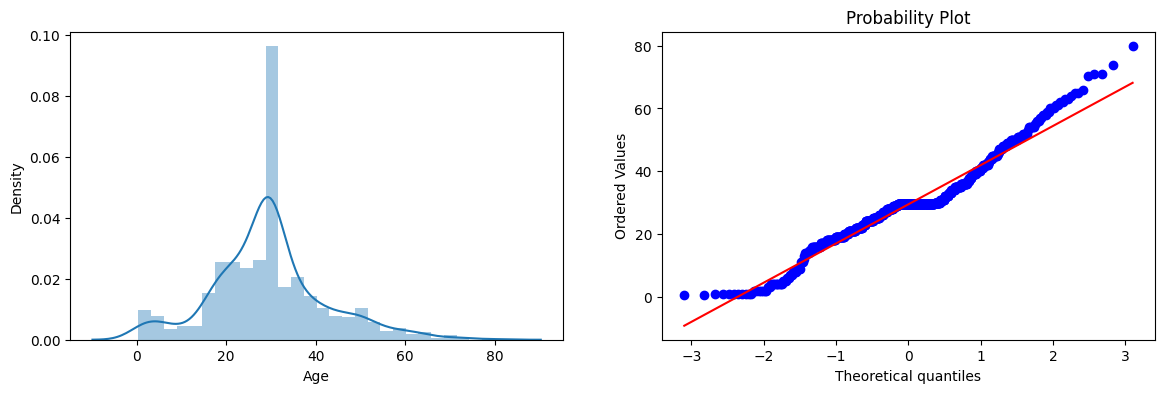

In [8]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)

plt.show()

/tmp/ipython-input-401592523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


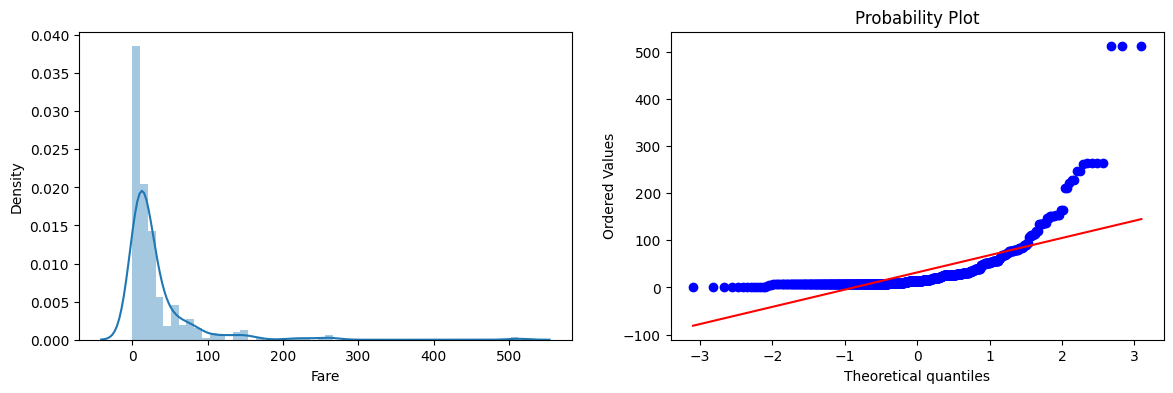

In [9]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)

plt.show()

#### Accuracy without Feature Transformation

In [10]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [11]:
clf.fit(x_train, y_train)
clf1.fit(x_train,y_train)

ypred = clf.predict(x_test)
ypred1 = clf1.predict(x_test)

print(f'Accuracy LR', accuracy_score(y_test, ypred))
print(f'Accuracy DT', accuracy_score(y_test, ypred1))

Accuracy LR 0.659217877094972
Accuracy DT 0.659217877094972


#### Accuracy After Log Transformation

In [18]:
x_train

,Age,Fare
53,29.000000,26.0000
611,29.699118,7.0500
239,33.000000,12.2750
784,25.000000,7.0500
453,49.000000,89.1042
...,...,...
647,56.000000,35.5000
36,29.699118,7.2292
367,29.699118,7.2292
630,80.000000,30.0000


In [15]:
ftnf1 = FunctionTransformer(func = np.log1p)

In [16]:
x_train_transformed = ftnf1.fit_transform(x_train)
x_test_transformed = ftnf1.transform(x_test)

In [17]:
x_train_transformed.head()

,Age,Fare
53,3.401197,3.295837
611,3.424234,2.085672
239,3.526361,2.585883
784,3.258097,2.085672
453,3.912023,4.500967


/tmp/ipython-input-3140035945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Age'])


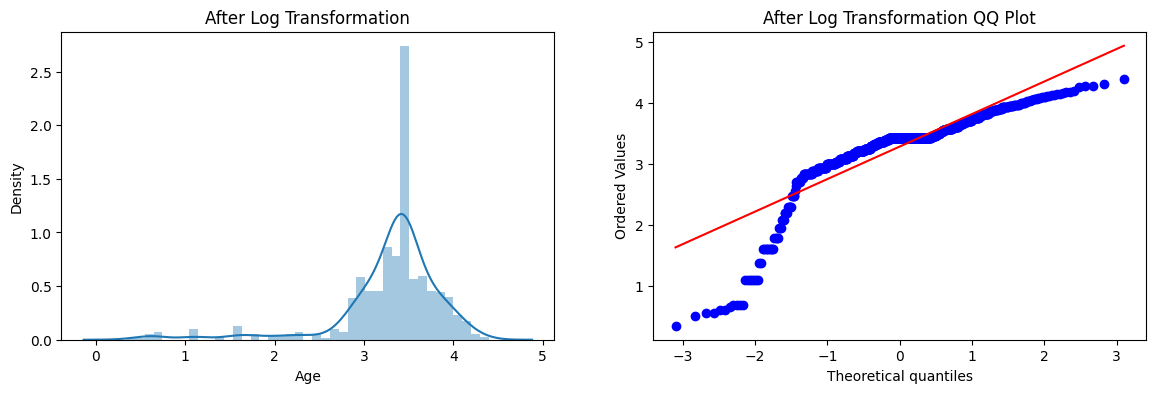

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train_transformed['Age'])
plt.title('After Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

/tmp/ipython-input-2482126710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Fare'])


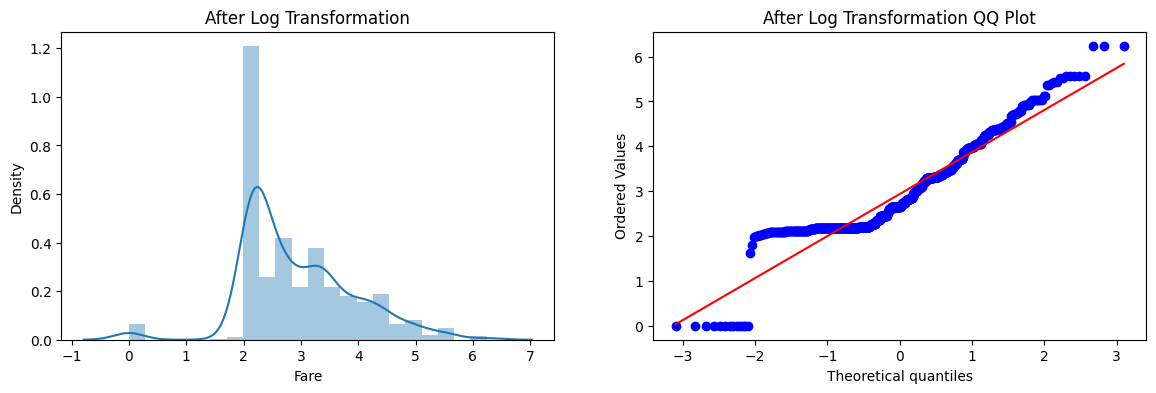

In [25]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train_transformed['Fare'])
plt.title('After Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf1.fit(x_train_transformed, y_train)

ypredi = clf.predict(x_test_transformed)
ypredi1 = clf1.predict(x_test_transformed)

print(f'Accuracy LR', accuracy_score(y_test, ypredi))
print(f'Accuracy DT', accuracy_score(y_test, ypredi1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.664804469273743


##### A More Reliable way to check is taking mean of results after performing series of splits
##### It is done by `Cross_val_score()`

In [28]:
x_transformed = ftnf1.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, x_transformed, Y, scoring = 'accuracy', cv =10)))
print('LR',np.mean(cross_val_score(clf1, x_transformed, Y, scoring = 'accuracy', cv =10)))

LR 0.678027465667915
LR 0.6577278401997504


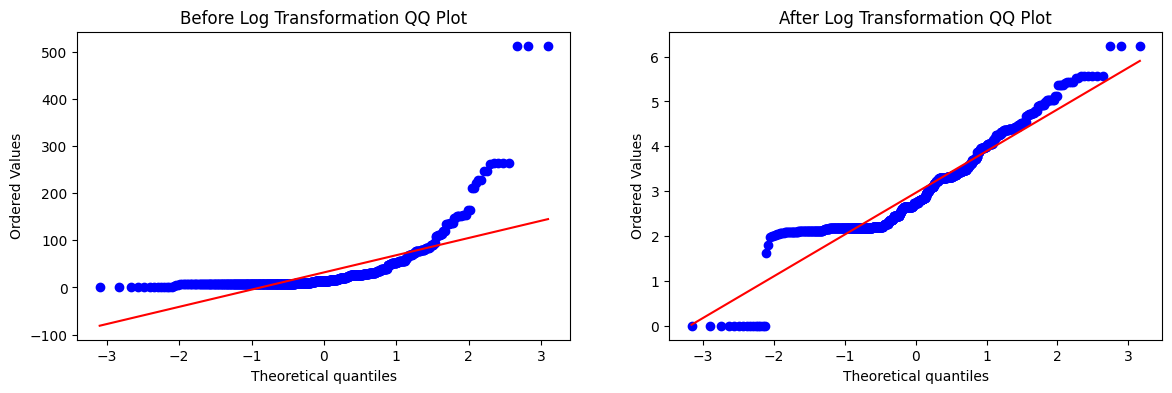

In [30]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(x_transformed['Fare'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

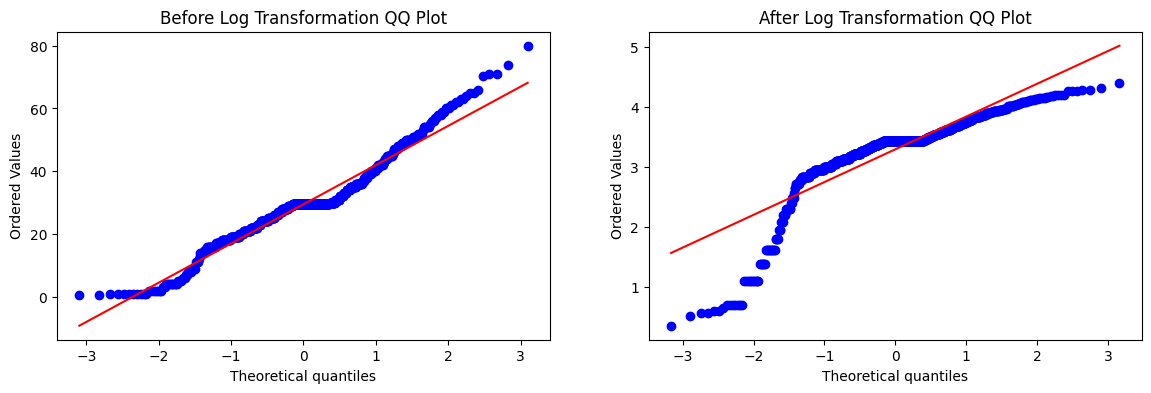

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(x_transformed['Age'], dist = 'norm', plot =plt)
plt.title('After Log Transformation QQ Plot')
plt.show()

In [34]:
# After applying transformation to Age : it got worse whereas, Fare: has seen improvements

# Reason : It happened as generally log is applkied to right skewed data,
# which in this case Age wasn't, hence can be confirmed

#### Appling Log transformation to just `Fare` Column

In [38]:
x_train.shape

(712, 2)

In [51]:
tnf0 = ColumnTransformer([('logtnf', FunctionTransformer(func = np.log1p), [1] )], remainder='passthrough')

In [52]:
x_train_transformed = tnf0.fit_transform(x_train)
x_test_transformed = tnf0.transform(x_test)

In [54]:
meow = pd.DataFrame(x_train_transformed)
meow.head()

,0,1
0,3.295837,29.000000
1,2.085672,29.699118
2,2.585883,33.000000
3,2.085672,25.000000
4,4.500967,49.000000


In [55]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf1.fit(x_train_transformed,y_train)

ypred = clf.predict(x_test_transformed)
ypred1 = clf1.predict(x_test_transformed)

print(f'Accuracy LR', accuracy_score(y_test, ypred))
print(f'Accuracy DT', accuracy_score(y_test, ypred1))

Accuracy LR 0.6983240223463687
Accuracy DT 0.6480446927374302


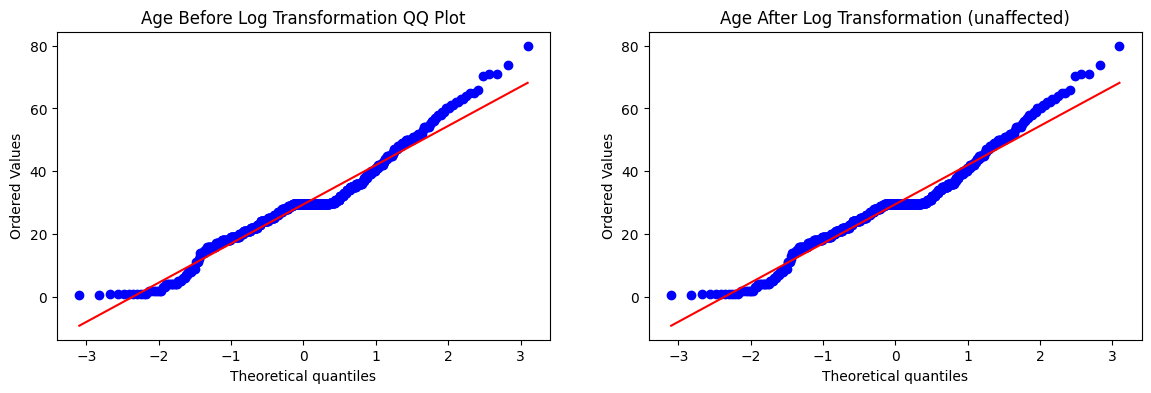

In [62]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Age Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(meow[1], dist = 'norm', plot =plt)
plt.title('Age After Log Transformation (unaffected)')
plt.show()

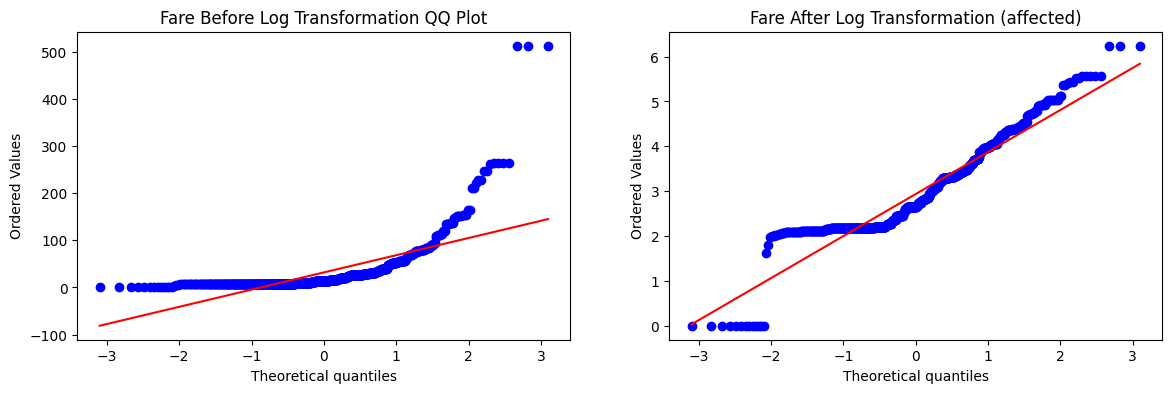

In [64]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Fare Before Log Transformation QQ Plot')

plt.subplot(122)
stats.probplot(meow[0], dist = 'norm', plot =plt)
plt.title('Fare After Log Transformation (affected)')
plt.show()

In [65]:
# Just to check we can now apply `cross_val_score(on x_train_transformed)`

In [66]:
x_transformed = tnf0.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, x_transformed, Y, scoring = 'accuracy', cv =10)))
print('LR',np.mean(cross_val_score(clf1, x_transformed, Y, scoring = 'accuracy', cv =10)))

LR 0.6712609238451936
LR 0.6610611735330837


#### Applying Other Transformers

In [78]:
def apply_transform(transform):
  X = df.iloc[:,[5,9]]
  Y = df.iloc[:,1]

  tnf = ColumnTransformer([
      ('transform', FunctionTransformer(func = transform), ['Fare'])
  ],remainder = 'passthrough')

  x_transform = tnf.fit_transform(X)

  clf = LogisticRegression()
  print('LR Accuracy',np.mean(cross_val_score(clf, x_transform, Y, scoring = 'accuracy', cv =10)))

  plt.figure(figsize = (14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist = 'norm', plot = plt)
  plt.title('Fare before Transformation')

  plt.subplot(122)
  stats.probplot(x_transform[:,0], dist = 'norm', plot = plt)
  plt.title(f'Fare after {transform} Transformation')

  plt.show()



LR Accuracy 0.61729088639201


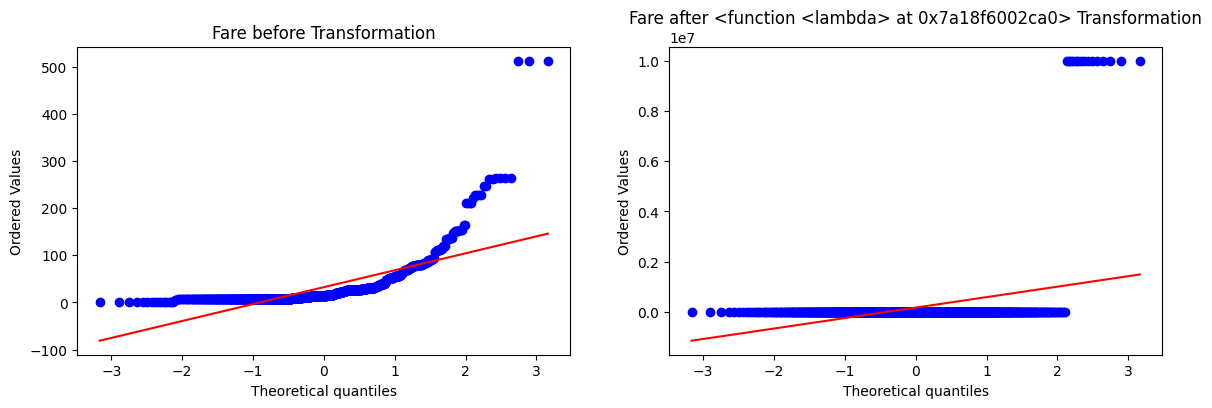

In [87]:
apply_transform(lambda a: 1/(a+0.0000001))